## Erick Iván Castro Granados 

## Tarea Árboles de Decisión

## ITAM



In [153]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from time import sleep
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [50]:
plt.rcParams["figure.figsize"] = (8, 5)

In [11]:
moons = make_moons(n_samples=10_000, noise=0.4, random_state=25)
X = moons[0]
Y = moons[1]

Text(0.5, 1.0, 'Decision map for a decision tree with max_depth=5')

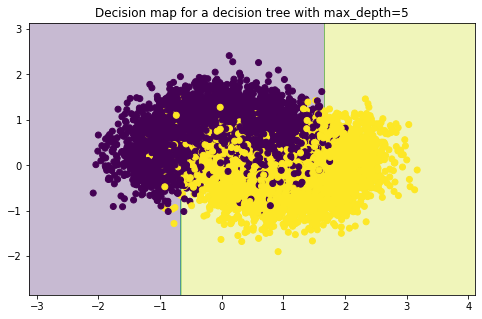

In [111]:
max_depth = 5
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_clf.fit(X, Y)
###
x1min, x2min = X.min(axis=0) * 1.5
x1max, x2max = X.max(axis=0) * 1.3
x1map, x2map = np.mgrid[x1min:x1max:0.01, x2min:x2max:0.01]
####
xpred = np.c_[x1map.reshape(-1,1), x2map.reshape(-1,1)]
ypred = tree_clf.predict(xpred).reshape(x1map.shape)
####
plt.contourf(x1map, x2map, ypred, alpha=0.3)
plt.scatter(*X.T, c=Y)
plt.title(f"Decision map for a decision tree with max_depth={max_depth}")

In [54]:
# Estimando probabilidades en un árbol de decisión
Xt = [[-2.5, -1.5], [0, 0], [1, 2.5], [3, 1]]
for xt in Xt:
    x0, x1 = xt
    print(f"p(x0={x0}, x1={x1})", end=" ")
    print(tree_clf.predict_proba([xt]))

p(x0=-2.5, x1=-1.5) [[0.91428571 0.08571429]]
p(x0=0, x1=0) [[0.13289505 0.86710495]]
p(x0=1, x1=2.5) [[0.83336809 0.16663191]]
p(x0=3, x1=1) [[0.04480652 0.95519348]]


In [94]:
## Dividimos entre train y test set usando train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=314)

In [173]:
## Realiza una búsqueda con cross-validation para encontrar hiperparámetros que mejoren un modelo de DecisionTreeClassifier. 
##Comenta tus resultados y lo que encontró el modelo
from sklearn.preprocessing import PowerTransformer
csel = ColumnTransformer([
    ("continuous", SimpleImputer(), moons[1])
    ])

pipe = Pipeline([
   # ("col_sel", csel),
    ("tree", DecisionTreeClassifier(max_depth=4, random_state=314))
])

In [174]:
## Regresamos los resultados y hacemos el promedio de las 5 rondas del cross validation que se corrieron

cv = cross_validate(pipe, xtrain, ytrain, cv=4, scoring=["precision", "recall", "accuracy"])
pre = cv['test_precision']
rec = cv['test_recall']
acc = cv['test_accuracy']
print(f"El valor de la precisión en promedio: {pre.mean():0.2f}")
print(f"El valor del recall en promedio: {rec.mean():0.2f}")
print(f"El valor del accuracy en promedio: {acc.mean():0.2f}")

El valor de la precisión en promedio: 0.87
El valor del recall en promedio: 0.83
El valor del accuracy en promedio: 0.85


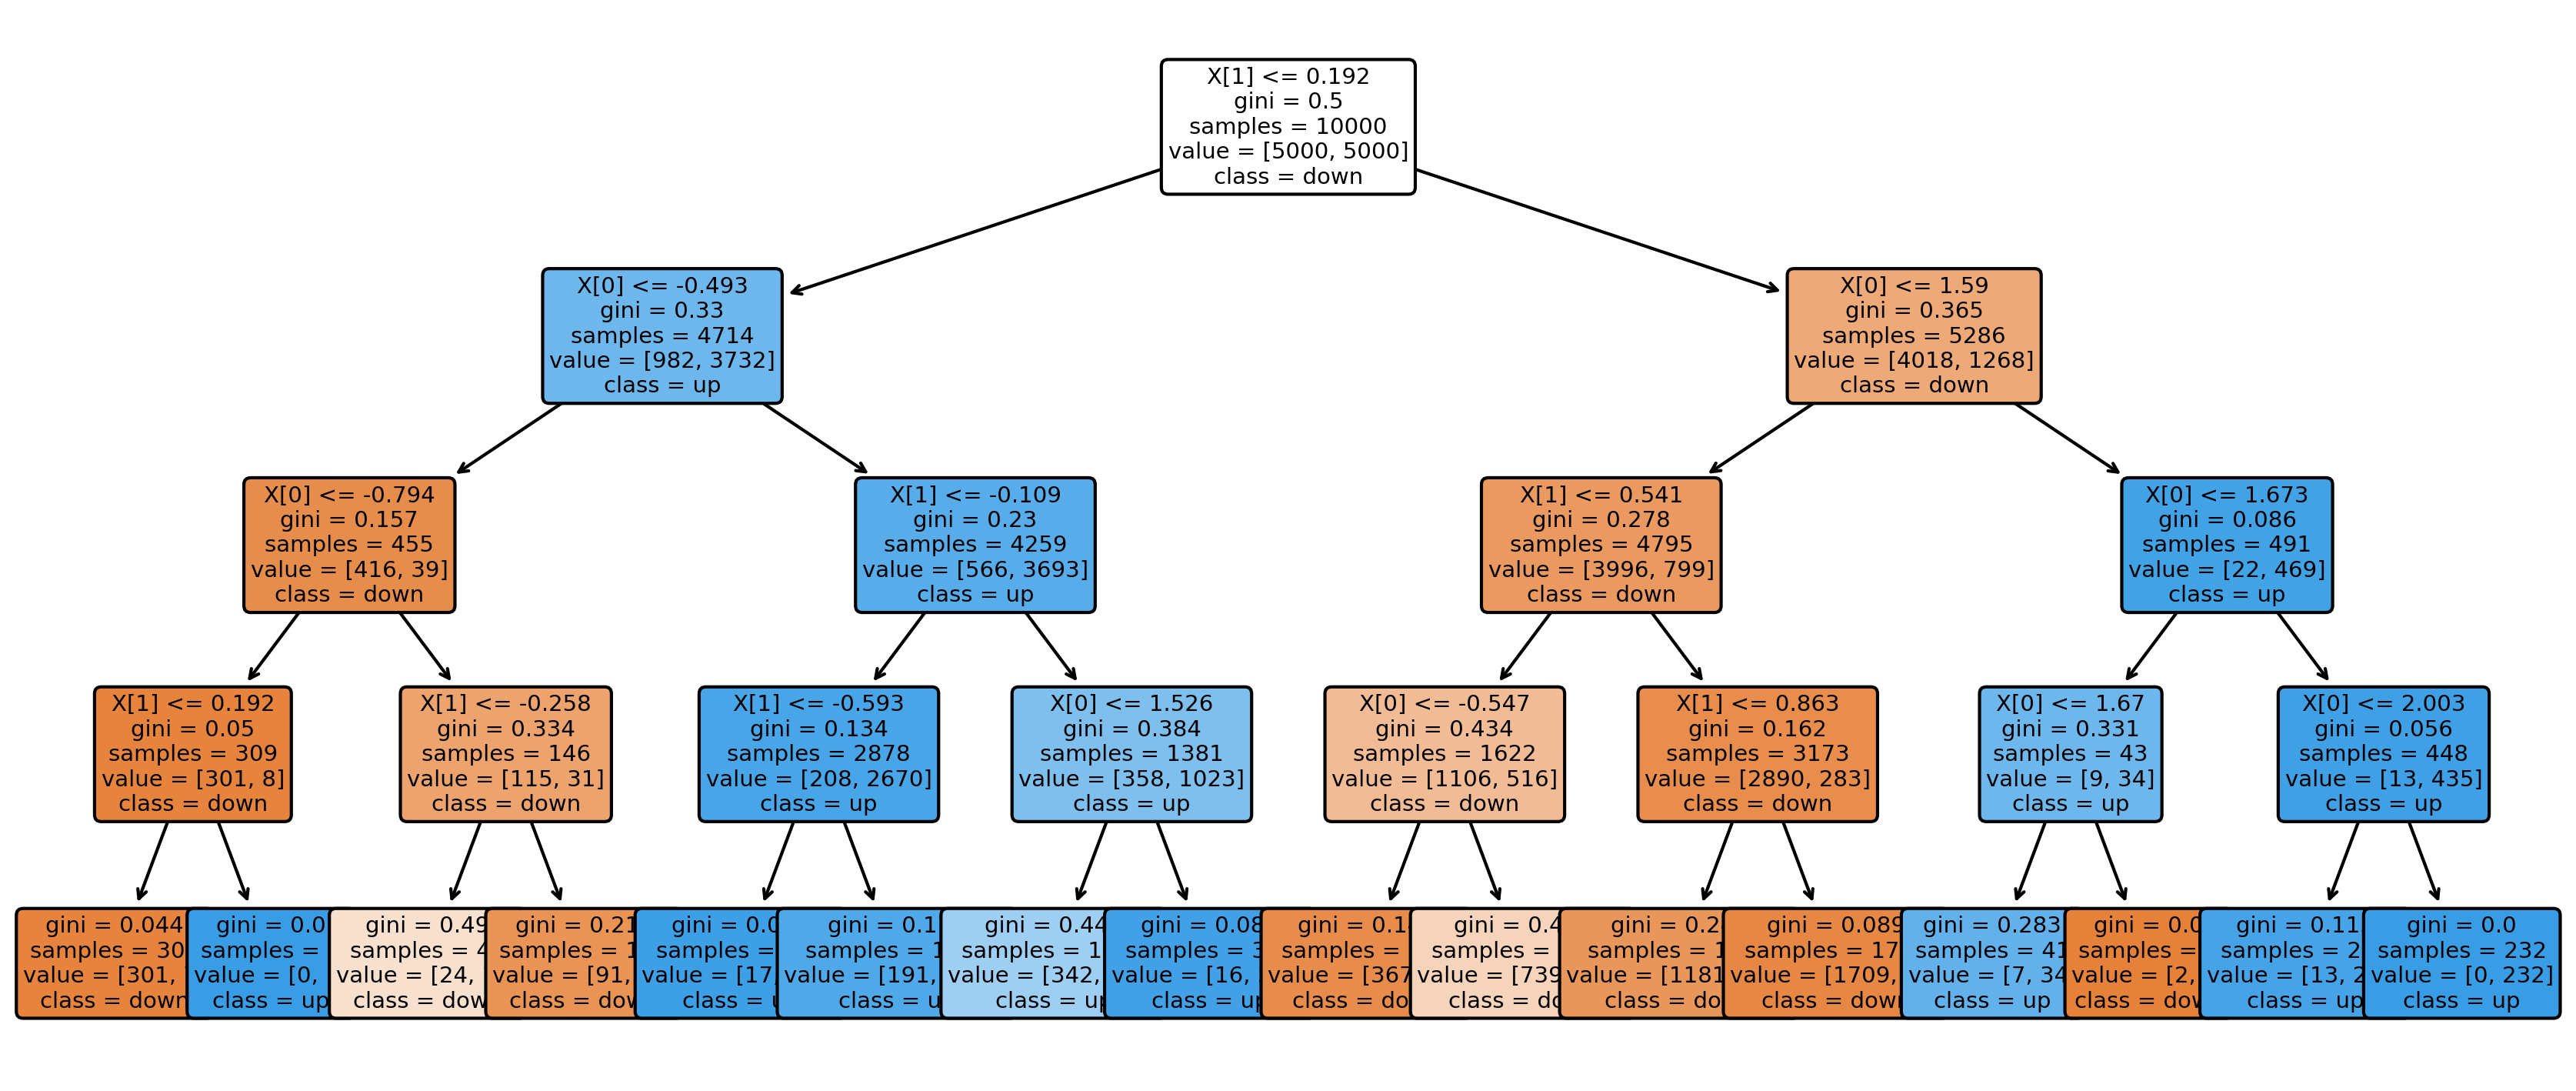

In [165]:
pipe.fit(X, Y);

plt.figure(dpi=300, figsize=(14, 6))
plot_tree(pipe.named_steps["tree"],
          class_names=["down", "up"],
         rounded=True,
         filled=True,
         fontsize=7);

## Resultados: 

Podemos observar que el árbol empieza con un gini index de 0.5, que es practiamente igual a tirar una moneda. 
Conforme vamos bajando a los nodos inferiores, el gini index se va haciendo más pequeño hasta llegar a cero. 
Esto quiere decir que dentro de todos los datos que van bajando, existe una perfecta igualdad, o que los valores son muy parecidos entre ellos. 
Practicamente al sólo tener dos categorías, cero y uno, nuestro árbol esta logrando acomodar de una manera muy eficaz la mayoría de los datos de la muestra.